In [1]:
import xarray as xr
from pcv.map import SEMMap
import numpy as np
import matplotlib.pyplot as plt

/home/anand/.conda/envs/pcv/lib/python3.10/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


```
mod_10 = """
# measurement model

lai_summer ~ swvlall_summer + lai_spring + t2m_winter+ tp_winter
swvlall_summer ~ lai_spring + swvlall_spring
lai_spring ~ swvlall_spring + t2m_winter+ tp_winter 
swvlall_spring ~ swvlall_winter 
swvlall_winter ~ t2m_winter+ tp_winter

"""
```

In [2]:
model_num = 10
sem_data = xr.open_dataset(f"/data/compoundx/anand/PCV/data/sem_data_{model_num}_gleam.nc")

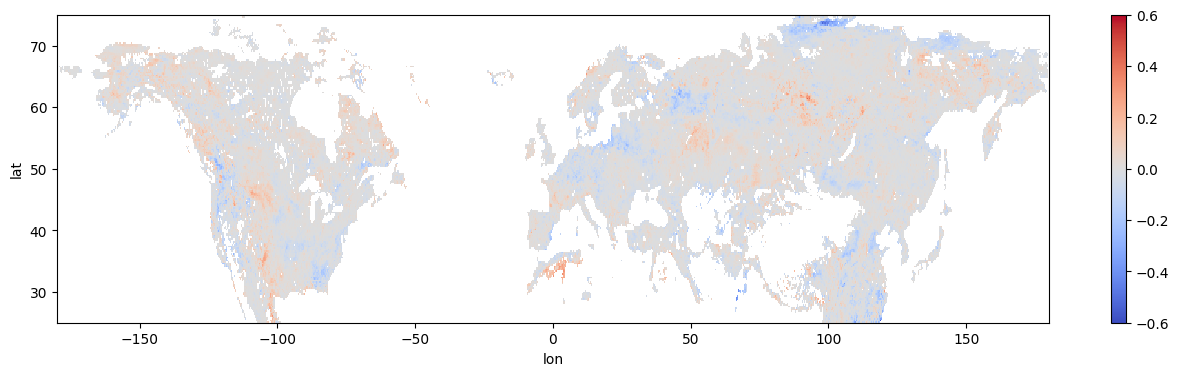

In [3]:
(
(
    sem_data['lai_summer~swvlall_summer_Estimate'] * 
    sem_data['swvlall_summer~swvlall_spring_Estimate'] *
    sem_data['swvlall_spring~swvlall_winter_Estimate'] *
    sem_data['swvlall_winter~t2m_winter_Estimate']
) 
+ 
(
    sem_data['lai_summer~swvlall_summer_Estimate'] *
    sem_data['swvlall_summer~lai_spring_Estimate'] *
    sem_data['lai_spring~swvlall_spring_Estimate'] *
    sem_data['swvlall_spring~swvlall_winter_Estimate'] *
    sem_data['swvlall_winter~t2m_winter_Estimate']

)
+ 
(
    sem_data['lai_summer~lai_spring_Estimate'] *
    sem_data['lai_spring~swvlall_spring_Estimate'] *
    sem_data['swvlall_spring~swvlall_winter_Estimate'] *
    sem_data['swvlall_winter~t2m_winter_Estimate']

)
+
(
    sem_data['lai_summer~lai_spring_Estimate'] *
    sem_data['lai_spring~t2m_winter_Estimate']  
)
+

(
    sem_data['lai_summer~swvlall_summer_Estimate'] *
    sem_data['swvlall_summer~lai_spring_Estimate'] *
    sem_data['lai_spring~t2m_winter_Estimate'] 
)
# +
# (
#     sem_data['lai_summer~t2m_winter_Estimate'] 
# )
).plot(figsize = (16,4), cmap = "coolwarm", vmin = -0.6, vmax = 0.6)
plt.savefig(f"t2m_{model_num}_indirect_gleam.png")

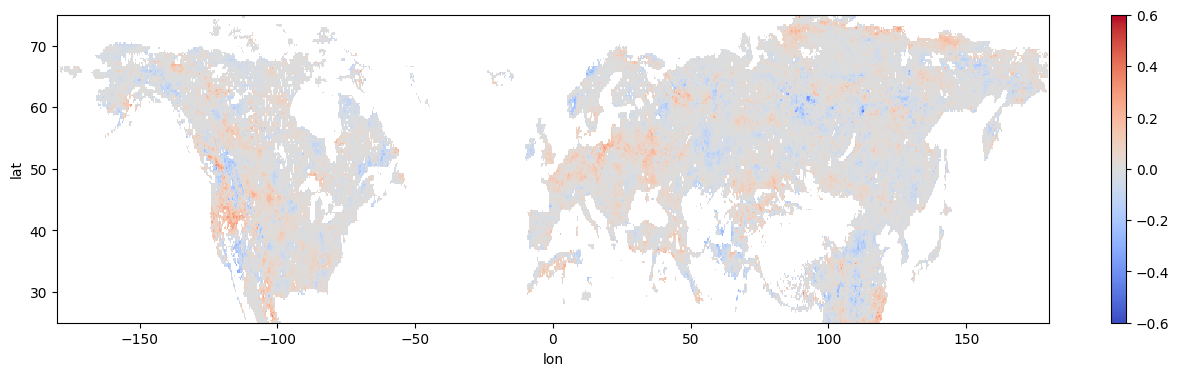

In [4]:
(
(
    sem_data['lai_summer~swvlall_summer_Estimate'] * 
    sem_data['swvlall_summer~swvlall_spring_Estimate'] *
    sem_data['swvlall_spring~swvlall_winter_Estimate'] *
    sem_data['swvlall_winter~tp_winter_Estimate']
) 
+ 
(
    sem_data['lai_summer~swvlall_summer_Estimate'] *
    sem_data['swvlall_summer~lai_spring_Estimate'] *
    sem_data['lai_spring~swvlall_spring_Estimate'] *
    sem_data['swvlall_spring~swvlall_winter_Estimate'] *
    sem_data['swvlall_winter~tp_winter_Estimate']

)
+ 
(
    sem_data['lai_summer~lai_spring_Estimate'] *
    sem_data['lai_spring~swvlall_spring_Estimate'] *
    sem_data['swvlall_spring~swvlall_winter_Estimate'] *
    sem_data['swvlall_winter~tp_winter_Estimate']

)
+
(
    sem_data['lai_summer~lai_spring_Estimate'] *
    sem_data['lai_spring~tp_winter_Estimate']  
)
+

(
    sem_data['lai_summer~swvlall_summer_Estimate'] *
    sem_data['swvlall_summer~lai_spring_Estimate'] *
    sem_data['lai_spring~tp_winter_Estimate'] 
)
# +
# (
#     sem_data['lai_summer~t2m_winter_Estimate'] 
# )
).plot(figsize = (16,4), cmap = "coolwarm", vmin = -0.6, vmax = 0.6)
plt.savefig(f"tp_{model_num}_indirect_gleam.png")